In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/home/apprennant/Food Fact/Data/nutri_score.csv")
df




,code,product_name,generic_name,quantity,countries,packaging,ingredients_text,allergens,traces,serving_size,...,magnesium_100g,zinc_100g,copper_100g,manganese_100g,selenium_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,cocoa_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,Farine de blé noir,Unknown,1kg,France,Unknown,Unknown,Unknown,Unknown,0 g,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4530,Banana Chips Sweetened (Whole),Unknown,Unknown,United States,Unknown,"Bananas, vegetable oil (coconut oil, corn oil ...",Unknown,Unknown,28 g (1 ONZ),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,14.0
2,4559,Peanuts,Unknown,Unknown,United States,Unknown,"Peanuts, wheat flour, sugar, rice flour, tapio...",Unknown,Unknown,28 g (0.25 cup),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16087,Organic Salted Nut Mix,Unknown,Unknown,United States,Unknown,"Organic hazelnuts, organic cashews, organic wa...",Unknown,Unknown,28 g (0.25 cup),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0
4,16094,Organic Polenta,Unknown,Unknown,United States,Unknown,Organic polenta,Unknown,Unknown,35 g (0.25 cup),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11822337540,Dried Sweetened Cranberries,Unknown,Unknown,United States,Unknown,"Cranberries, sugar, sunflower oil",Unknown,Unknown,40 g (0.25 cup),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0
9996,11822337557,Tomato Ketchup,Unknown,Unknown,United States,Unknown,"Tomato concentrate, high fructose corn syrup, ...",Unknown,Unknown,17 g (1 Tbsp),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,11822337571,Diced Tomatoes,Unknown,Unknown,United States,Unknown,"Tomatoes, tomato juice, less than 2% of: salt,...",Unknown,Unknown,121 g (0.5 cup),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,11822337601,Green Tea,Unknown,Unknown,United States,Unknown,Green tea,Unknown,Unknown,2 g (1 TEA BAG),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


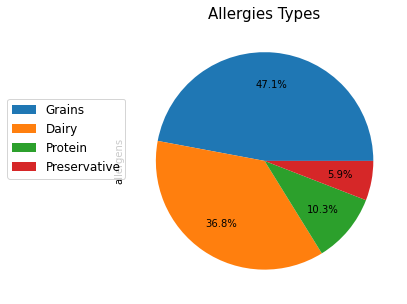

In [2]:
#Nutrition Grade
#Filter Unknown nutrition Grande
grade = df[df.allergens != 'Unknown']

labels = grade["allergens"].value_counts().index
values = grade["allergens"].value_counts()

grade['allergens'].value_counts(normalize=True).sort_index(ascending=False)

#fig, ax = plt.subplots()
values.plot.pie(autopct="%1.1f%%", pctdistance=0.7, figsize=(5,5), labels=None)
plt.title("Allergies Types", fontsize=15)
plt.legend(labels, bbox_to_anchor=(0.01, 0.75),
           fontsize=12)

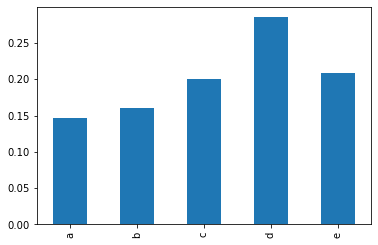

In [3]:
# nutrition_grade_fr 

#Filter Unknown Type
nutri = df[df.nutrition_grade_fr != 'u']
nutri

s = nutri['nutrition_grade_fr'].value_counts(normalize=True).sort_index(ascending=True)
s.plot(kind='bar')
plt.show()

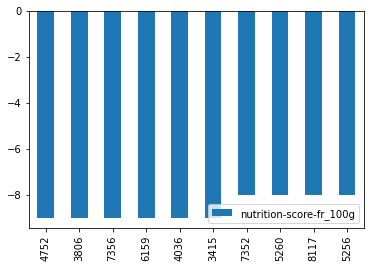

In [4]:
countriestop10_nutri = df[['product_name','nutrition-score-fr_100g']]
min_product = top10_nutri.groupby('product_name').min()

min_product = top10_nutri.sort_values(by="nutrition-score-fr_100g")
product = min_product.head(10)

product.plot(kind = 'bar')
plt.show()

<AxesSubplot:xlabel='nutrition-score-fr_100g'>

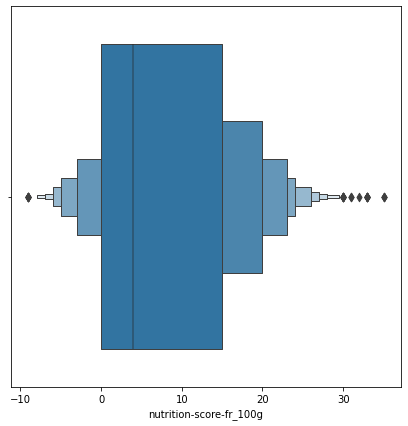

In [5]:
# sous la forme de boxplot
plt.figure(figsize = (7,7))
sns.boxenplot(x = df["nutrition-score-fr_100g"], k_depth='proportion')

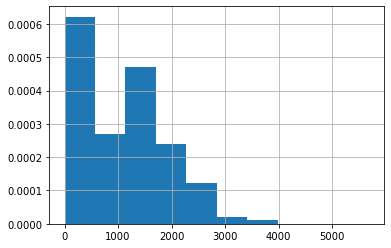

In [6]:
ax=df["energy_100g"].hist(density=True,bins=10)

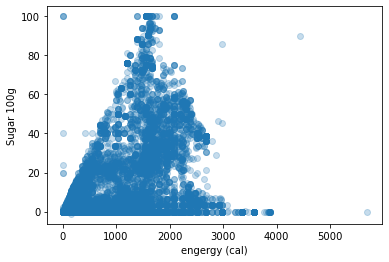

In [33]:
import scipy.stats as st
import numpy as np

plt.plot(df["energy_100g"],df["sugars_100g"],'o',alpha=0.25)
plt.xlabel("engergy (cal)")
plt.ylabel("Sugar 100g")
plt.show()

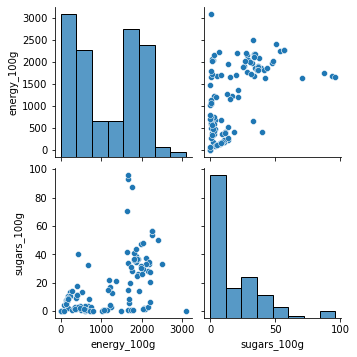

In [26]:
#Engergy, Sugar and Nutrition Grade in France
df2 = df[df.countries == 'France']
df2 = df2[df2.nutrition_grade_fr != 'u']
df2 = df2[['countries','energy_100g','sugars_100g','nutrition_grade_fr']]
df2

sns.pairplot(df2)

array([[<AxesSubplot:title={'center':'sugars_100g'}>,
        <AxesSubplot:title={'center':'salt_100g'}>],
       [<AxesSubplot:title={'center':'vitamin-a_100g'}>,
        <AxesSubplot:title={'center':'vitamin-c_100g'}>]], dtype=object)

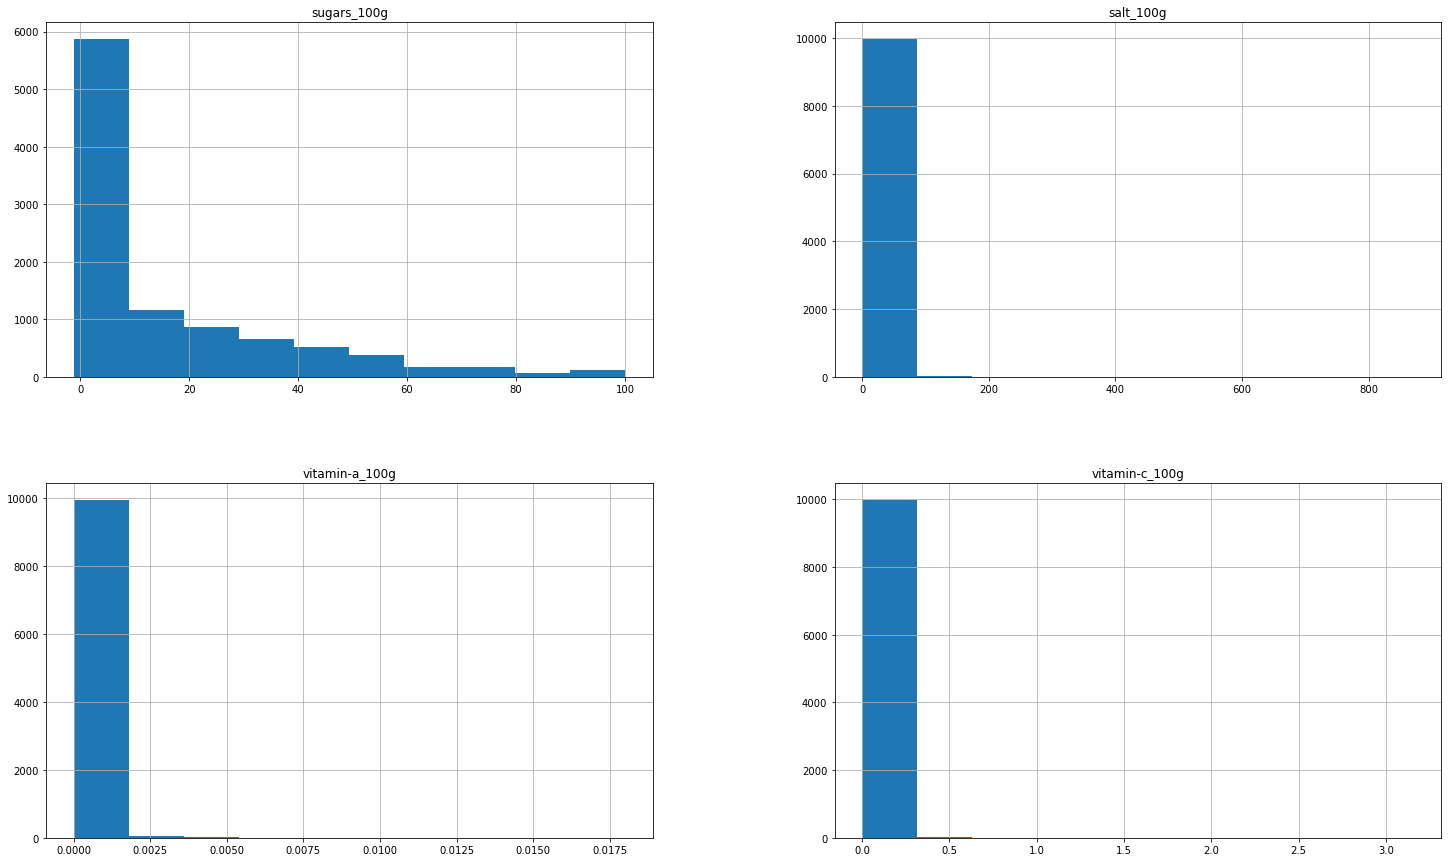

In [32]:
df3 = df[[ 'sugars_100g', 'salt_100g', 'vitamin-a_100g', 'vitamin-c_100g']]
df3.hist(figsize=(25,15))